<a href="https://colab.research.google.com/github/Bobrolos/Python-/blob/main/Course_project_Lavrova_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение библиотек и скриптов

In [ ]:
import pandas as pd
import numpy as np
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

ModuleNotFoundError: ignored

In [ ]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [ ]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

Пути к директориям и файлам

In [ ]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'
SAMPLE_SUBMIT_PATH = 'sample_submission.csv'

Загрузка данных

In [ ]:
df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [ ]:
test_df = pd.read_csv(TEST_DATASET_PATH)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


## Описание датасета

Home Ownership - домовладение
Annual Income - годовой доход
Years in current job - количество лет на текущем месте работы
Tax Liens - налоговые обременения
Number of Open Accounts - количество открытых счетов
Years of Credit History - количество лет кредитной истории
Maximum Open Credit - наибольший открытый кредит (максимальная сумма, которая когда-либо была доступна клиенту)
Number of Credit Problems - количество проблем с кредитом
Months since last delinquent - количество месяцев с последней просрочки платежа
Bankruptcies - банкротства
Purpose - цель кредита
Term - срок кредита
Current Loan Amount - текущая сумма кредита (сумма, которую еще предстоит выплатить клиенту)
Current Credit Balance - текущий кредитный баланс (сумма, которую может тратить клиент с кредитного счета)
Monthly Debt - ежемесячный долг
Credit Score - баллы кредитного рейтинга
Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [ ]:
df.shape

(7500, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

## Обзор данных

Обзор целевой переменной

In [ ]:
df['Credit Default'].value_counts(normalize=True)

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

In [ ]:
df.describe(include='all')

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500,5.943000e+03,7129,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7500,7500,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
unique,4,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,2,NaN,NaN,NaN,NaN,NaN
top,Home Mortgage,NaN,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,debt consolidation,Short Term,NaN,NaN,NaN,NaN,NaN
freq,3637,NaN,2332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5944,5556,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.366392e+06,NaN,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,NaN,NaN,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,NaN,8.453392e+05,NaN,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,NaN,NaN,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,NaN,1.645970e+05,NaN,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,NaN,8.443410e+05,NaN,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,NaN,NaN,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,NaN,1.168386e+06,NaN,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,NaN,NaN,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,NaN,1.640137e+06,NaN,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,NaN,NaN,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000


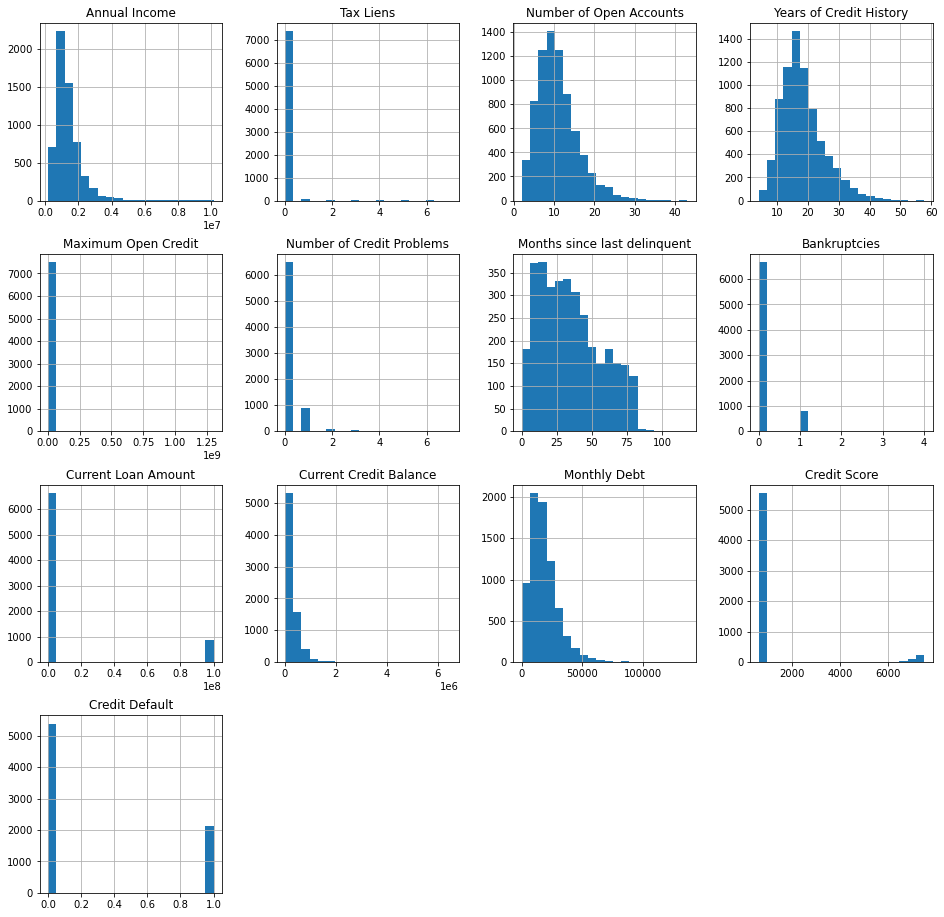

In [ ]:
df.hist(bins = 20, figsize = (16, 16))
plt.show()

Обзор номинативных/категориальных признаков

In [ ]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

### Корреляция с базовыми признаками

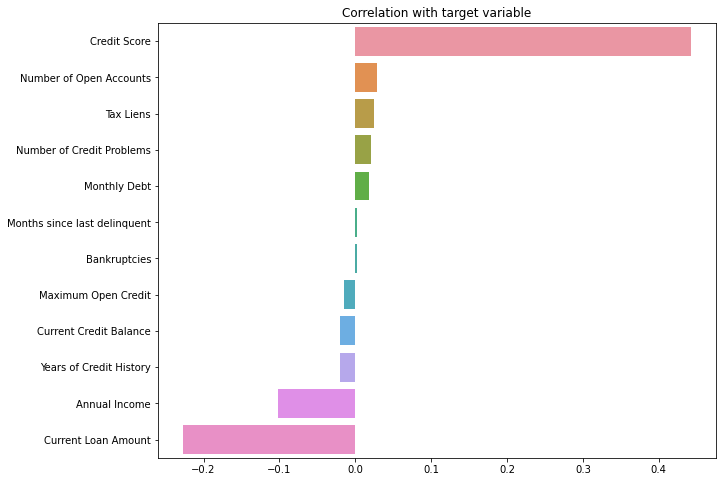

In [ ]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)


corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

### Анализ признакового пространства<a class="anchor" id="features_analysis"></a>

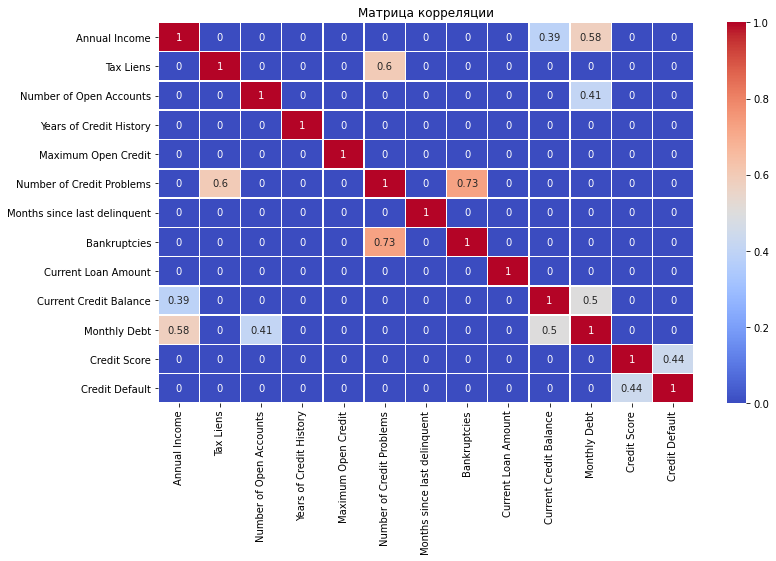

In [ ]:
plt.figure(figsize=(12, 7))

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляции')
plt.show()

### Обработка пропусков<a class="anchor" id="gaps"></a>

In [ ]:
df.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

'Annual Income'

In [ ]:
df['Annual Income'].median()

1168386.0

In [ ]:
df['Annual Income NaN'] = 0
df.loc[df['Annual Income'].isna(), 'Annual Income NaN'] = 1
test_df['Annual Income NaN'] = 0
test_df.loc[test_df['Annual Income'].isna(), 'Annual Income NaN'] = 1

In [ ]:
df['Annual Income'].fillna(df['Annual Income'].median(), inplace = True)
test_df['Annual Income'].fillna(test_df['Annual Income'].median(), inplace = True)

In [ ]:
df['Annual Income'].isna().sum()
test_df['Annual Income'].isna().sum()

0

'Years in current job'

In [ ]:
mode = df['Years in current job'].mode().values[0]
mode

'10+ years'

In [ ]:
df['Years in current job NaN'] = 0
df.loc[df['Years in current job'].isna(), 'Years in current job NaN'] = 1
df['Years in current job'].fillna(mode, inplace = True)

test_df['Years in current job NaN'] = 0
test_df.loc[df['Years in current job'].isna(), 'Years in current job NaN'] = 1
test_df['Years in current job'].fillna(mode, inplace = True)

In [ ]:
df['Years in current job'].isna().sum()

0

Current Loan Amount

In [ ]:
df['Current Loan Amount'].value_counts()

99999999.0    870
218064.0        6
89298.0         6
216106.0        5
265826.0        5
             ... 
104324.0        1
201080.0        1
427812.0        1
665544.0        1
191136.0        1
Name: Current Loan Amount, Length: 5386, dtype: int64

In [ ]:
df['Current Loan Amount Outlier'] = 0
df.loc[df['Current Loan Amount'] == 99999999.0, 'Current Loan Amount Outlier'] = 1
df.loc[df['Current Loan Amount'] == 99999999.0, 'Current Loan Amount'] = df['Current Loan Amount'].median()

test_df['Current Loan Amount Outlier'] = 0
test_df.loc[test_df['Current Loan Amount'] == 99999999.0, 'Current Loan Amount Outlier'] = 1
test_df.loc[test_df['Current Loan Amount'] == 99999999.0, 'Current Loan Amount'] = df['Current Loan Amount'].median()

In [ ]:
df[df['Current Loan Amount'] == 99999999.0]['Current Loan Amount'].count()

0

'Months since last delinquent'

In [ ]:
df.loc[df['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0
test_df.loc[test_df['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

'Bankruptcies'

In [ ]:
df['Bankruptcies'].median()
test_df['Bankruptcies'].median()

0.0

In [ ]:
df['Bankruptcies NaN'] = 0
df.loc[df['Bankruptcies'].isna(), 'Bankruptcies NaN'] = 1
df['Bankruptcies'].fillna(df['Bankruptcies'].median(), inplace = True)
df['Bankruptcies'].isna().sum()

test_df['Bankruptcies NaN'] = 0
test_df.loc[test_df['Bankruptcies'].isna(), 'Bankruptcies NaN'] = 1
test_df['Bankruptcies'].fillna(df['Bankruptcies'].median(), inplace = True)
test_df['Bankruptcies'].isna().sum()

0

'Credit Score'

In [ ]:
df['Credit Score'].median()

731.0

In [ ]:
df['Credit Score NaN'] = 0
df.loc[df['Credit Score'].isna(), 'Credit Score NaN'] = 1
df['Credit Score'].fillna(df['Credit Score'].median(), inplace = True)
df['Credit Score'].isna().sum()

test_df['Credit Score NaN'] = 0
test_df.loc[test_df['Credit Score'].isna(), 'Credit Score NaN'] = 1
test_df['Credit Score'].fillna(df['Credit Score'].median(), inplace = True)
test_df['Credit Score'].isna().sum()

0

In [ ]:
df.isna().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
Annual Income NaN               0
Years in current job NaN        0
Current Loan Amount Outlier     0
Bankruptcies NaN                0
Credit Score NaN                0
dtype: int64

In [ ]:
test_df.isna().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Annual Income NaN               0
Years in current job NaN        0
Current Loan Amount Outlier     0
Bankruptcies NaN                0
Credit Score NaN                0
dtype: int64

Преобразуем значения признака Home Ownership в dummy переменные

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Home Ownership'])], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Home Ownership'])], axis=1)

Преобразуем значения Years in current job в числовые

In [ ]:
df['Years in current job'] = df['Years in current job'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7,'8 years':8,'9 years':9,'10+ years':10})
test_df['Years in current job'] = test_df['Years in current job'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7,'8 years':8,'9 years':9,'10+ years':10})

Tax Liens приведём к бинарному виду

In [ ]:
df.loc[df['Tax Liens'] > 0, 'Tax Liens'] = 1
test_df.loc[test_df['Tax Liens'] > 0, 'Tax Liens'] = 1

Number of Credit Problems приведём к бинарному виду

In [ ]:
df.loc[df['Number of Credit Problems'] > 0, 'Number of Credit Problems'] = 1
test_df.loc[test_df['Number of Credit Problems'] > 0, 'Number of Credit Problems'] = 1

Значения признака Bankruptcies также необходимо привести к бинарному виду по факту банкротства

In [ ]:
df.loc[df['Bankruptcies'] > 0, 'Bankruptcies'] = 1
test_df.loc[test_df['Bankruptcies'] > 0, 'Bankruptcies'] = 1

Срок кредита (Term) также лучше сделать бинарным

In [ ]:
df['Term'] = df['Term'].replace({'Short Term':0, 'Long Term':1})
test_df['Term'] = test_df['Term'].replace({'Short Term':0, 'Long Term':1})

### Отбор признаков

In [ ]:
FEATURE_NAMES_SELECTED = ['Annual Income', 
                 'Tax Liens', 
                 'Term',
                 'Number of Open Accounts', 
                 'Years of Credit History', 
                 'Maximum Open Credit', 
                 'Number of Credit Problems', 
                 'Bankruptcies',
                 'Current Loan Amount', 
                 'Current Credit Balance', 
                 'Monthly Debt', 
                 'Credit Score', 
                 'Years in current job', 
                ]

new_feature_names = []

TARGET_NAME = 'Credit Default'

### Разбиение на train и test

In [ ]:
X = df[FEATURE_NAMES_SELECTED]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

### Балансировка целевой переменной

In [ ]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    4047
1    3156
Name: Credit Default, dtype: int64

In [ ]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

# Построение и оценка базовых моделей


### Логистическая регрессия

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      4047
           1       0.64      0.42      0.51      3156

    accuracy                           0.64      7203
   macro avg       0.64      0.62      0.61      7203
weighted avg       0.64      0.64      0.63      7203

TEST

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1340
           1       0.46      0.40      0.43       535

    accuracy                           0.69      1875
   macro avg       0.62      0.61      0.61      1875
weighted avg       0.68      0.69      0.69      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1089  251
1                321  214


### k ближайших соседей

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      4047
           1       0.74      0.68      0.71      3156

    accuracy                           0.75      7203
   macro avg       0.75      0.75      0.75      7203
weighted avg       0.75      0.75      0.75      7203

TEST

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1340
           1       0.35      0.38      0.37       535

    accuracy                           0.63      1875
   macro avg       0.55      0.55      0.55      1875
weighted avg       0.63      0.63      0.63      1875

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               971  369
1               332  203


## Бустинговые алгоритмы

### XGBoost

In [ ]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

[13:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ad\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


TRAIN

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4047
           1       0.97      0.96      0.96      3156

    accuracy                           0.97      7203
   macro avg       0.97      0.97      0.97      7203
weighted avg       0.97      0.97      0.97      7203

TEST

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1340
           1       0.57      0.47      0.52       535

    accuracy                           0.75      1875
   macro avg       0.69      0.67      0.67      1875
weighted avg       0.74      0.75      0.74      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1147  193
1                281  254


### LightGBM

In [ ]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      4047
           1       0.94      0.87      0.90      3156

    accuracy                           0.92      7203
   macro avg       0.92      0.91      0.91      7203
weighted avg       0.92      0.92      0.92      7203

TEST

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1340
           1       0.56      0.49      0.52       535

    accuracy                           0.75      1875
   macro avg       0.68      0.67      0.67      1875
weighted avg       0.74      0.75      0.74      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1135  205
1                273  262


### CatBoost

In [ ]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train, plot=True)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

TRAIN

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4047
           1       0.93      0.83      0.88      3156

    accuracy                           0.90      7203
   macro avg       0.90      0.89      0.89      7203
weighted avg       0.90      0.90      0.90      7203

TEST

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1340
           1       0.59      0.49      0.53       535

    accuracy                           0.76      1875
   macro avg       0.70      0.68      0.68      1875
weighted avg       0.75      0.76      0.75      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1158  182
1                274  261


### подбор гиперпараметров

In [ ]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)

In [ ]:
params = {'n_estimators':[50, 100, 200, 500], 
          'max_depth':[3, 5, 7, 10],
          'learning_rate':[0.001, 0.01, 0.05, 0.1]}

In [ ]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [ ]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X_train, y_train)

Wall time: 1min 28s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002219989FB20>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   scoring='f1')

In [ ]:
rs.best_params_

{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}

In [ ]:
rs.best_score_

0.7147836519179102

### Обучение и оценка финальной модели

In [ ]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=500, max_depth=3, learning_rate=0.1,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      4047
           1       0.84      0.71      0.77      3156

    accuracy                           0.81      7203
   macro avg       0.82      0.80      0.80      7203
weighted avg       0.81      0.81      0.81      7203

TEST

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1340
           1       0.54      0.51      0.53       535

    accuracy                           0.74      1875
   macro avg       0.67      0.67      0.67      1875
weighted avg       0.73      0.74      0.73      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1106  234
1                261  274
Wall time: 3.84 s


### Снижение степени переобучения

In [ ]:
final_model = catb.CatBoostClassifier(n_estimators=500, max_depth=3,
                                      l2_leaf_reg=10,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

NameError: ignored

In [ ]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [ ]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

NameError: ignored

In [ ]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

### Подбор оптимального размера выборки, кривая обучения

In [ ]:
final_model = catb.CatBoostClassifier(n_estimators=500, max_depth=3,
                                      class_weights=[1, 3.5],
                                      silent=True, random_state=21)

NameError: ignored

In [ ]:
show_learning_curve_plot(final_model, X, y)

In [ ]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

In [ ]:
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances, get_top=10)

In [ ]:
important_features_top

### итоговая модель

In [ ]:
final_model = catb.CatBoostClassifier(n_estimators=500, max_depth=3, l2_leaf_reg=10,
                                      silent=True, random_state=21)
final_model.fit(X_train[important_features_top], y_train)

y_train_pred = final_model.predict(X_train[important_features_top])
y_test_pred = final_model.predict(X_test[important_features_top])
y_test_pred_probs = final_model.predict_proba(X_test[important_features_top])

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.66      0.80      0.72      4047
           1       0.64      0.46      0.54      3156

    accuracy                           0.65      7203
   macro avg       0.65      0.63      0.63      7203
weighted avg       0.65      0.65      0.64      7203

TEST

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1340
           1       0.43      0.41      0.42       535

    accuracy                           0.67      1875
   macro avg       0.60      0.60      0.60      1875
weighted avg       0.67      0.67      0.67      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1042  298
1                314  221


In [ ]:
test_df.shape

(2500, 25)

In [ ]:
submit = pd.read_csv(SAMPLE_SUBMIT_PATH)
submit.head()

,Id,Credit Default
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [ ]:
predictions = final_model.predict(test_df[FEATURE_NAMES_SELECTED])
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
len(predictions)

2500

In [ ]:
submit['Credit Default'] = predictions

In [ ]:
submit.to_csv('submit2.csv', index=False)